In [162]:
import pandas as pd
import seaborn as sns
from scipy.spatial.distance import pdist, squareform

In [163]:
df = pd.read_csv("/Users/adriannabowen/CS 663 - Data Mining/Final Project/cleaned datasets/player_regular_season.csv")
df2 = pd.read_csv("/Users/adriannabowen/CS 663 - Data Mining/Final Project/cleaned datasets/team_season.csv")
df.head()
df2.head()

,Unnamed: 0,team,year,leag,o_fgm,o_fga,o_ftm,o_fta,o_oreb,o_dreb,...,d_pf,d_stl,d_to,d_blk,d_3pm,d_3pa,d_pts,pace,won,lost
0,0,BOS,1946,N,1397,5133,811,1375,0,0,...,0,0,0,0,0,0,3900,0.0,22,38
1,1,CH1,1946,N,1879,6309,939,1550,0,0,...,0,0,0,0,0,0,4471,0.0,39,22
2,2,CL1,1946,N,1674,5699,903,1428,0,0,...,0,0,0,0,0,0,4308,0.0,30,30
3,3,DE1,1946,N,1437,5843,923,1494,0,0,...,0,0,0,0,0,0,3918,0.0,20,40
4,4,NYK,1946,N,1465,5255,951,1438,0,0,...,0,0,0,0,0,0,3840,0.0,33,27


In [164]:
playerstats = df[(df.year == 2003)]
teamstats = df2[(df2.year == 2003)]

In [165]:
combine = pd.merge(playerstats, teamstats, how="left", on="team")
combine.head()

,Unnamed: 0_x,ilkid,year_x,firstname,lastname,team,leag_x,gp,minutes,pts,...,d_pf,d_stl,d_to,d_blk,d_3pm,d_3pa,d_pts,pace,won,lost
0,17944,ABDURSH01,2003,Shareef,Abdur-rahim,POR,N,32,728,319,...,1533.0,657.0,1066.0,390.0,417.0,1222.0,7544.0,88.500000,41.0,41.0
1,17945,ABDURSH01,2003,Shareef,Abdur-rahim,ATL,N,53,1957,1065,...,1699.0,731.0,1086.0,409.0,482.0,1345.0,7992.0,92.800003,28.0,54.0
2,17946,ABDURSH01,2003,Shareef,Abdur-rahim,TOT,N,85,2685,1384,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,17947,ALLENMA01,2003,Malik,Allen,MIA,N,45,616,191,...,1728.0,578.0,1161.0,439.0,431.0,1256.0,7359.0,89.400002,42.0,40.0
4,17948,ALLENRA02,2003,Ray,Allen,SEA,N,56,2152,1287,...,1658.0,629.0,1158.0,386.0,486.0,1394.0,8016.0,91.800003,37.0,45.0


In [166]:
dff = combine.groupby(["team"]).minutes.sum().reset_index()
dff.head()

,team,minutes
0,ATL,18442
1,BOS,19704
2,CHI,19831
3,CLE,19855
4,DAL,19805


In [167]:
totalstats = pd.merge(combine, dff, how="left", on="team")
totalstats.rename(columns={'minutes_y':'tm_mp'}, inplace=True)
totalstats.head()

,Unnamed: 0_x,ilkid,year_x,firstname,lastname,team,leag_x,gp,minutes_x,pts,...,d_stl,d_to,d_blk,d_3pm,d_3pa,d_pts,pace,won,lost,tm_mp
0,17944,ABDURSH01,2003,Shareef,Abdur-rahim,POR,N,32,728,319,...,657.0,1066.0,390.0,417.0,1222.0,7544.0,88.500000,41.0,41.0,19979
1,17945,ABDURSH01,2003,Shareef,Abdur-rahim,ATL,N,53,1957,1065,...,731.0,1086.0,409.0,482.0,1345.0,7992.0,92.800003,28.0,54.0,18442
2,17946,ABDURSH01,2003,Shareef,Abdur-rahim,TOT,N,85,2685,1384,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,76847
3,17947,ALLENMA01,2003,Malik,Allen,MIA,N,45,616,191,...,578.0,1161.0,439.0,431.0,1256.0,7359.0,89.400002,42.0,40.0,19755
4,17948,ALLENRA02,2003,Ray,Allen,SEA,N,56,2152,1287,...,629.0,1158.0,386.0,486.0,1394.0,8016.0,91.800003,37.0,45.0,19805


In [168]:
drop = ['leag_x','year_y', 'leag_y','pace','won','lost','oreb','dreb','pf','tpa','tpm','o_3pm','o_3pa','d_oreb','d_dreb']
stats = totalstats.drop(columns=drop)
stats.head()

,Unnamed: 0_x,ilkid,year_x,firstname,lastname,team,gp,minutes_x,pts,reb,...,d_reb,d_asts,d_pf,d_stl,d_to,d_blk,d_3pm,d_3pa,d_pts,tm_mp
0,17944,ABDURSH01,2003,Shareef,Abdur-rahim,POR,32,728,319,144,...,3308.0,1912.0,1533.0,657.0,1066.0,390.0,417.0,1222.0,7544.0,19979
1,17945,ABDURSH01,2003,Shareef,Abdur-rahim,ATL,53,1957,1065,495,...,3533.0,1803.0,1699.0,731.0,1086.0,409.0,482.0,1345.0,7992.0,18442
2,17946,ABDURSH01,2003,Shareef,Abdur-rahim,TOT,85,2685,1384,639,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,76847
3,17947,ALLENMA01,2003,Malik,Allen,MIA,45,616,191,119,...,3379.0,1525.0,1728.0,578.0,1161.0,439.0,431.0,1256.0,7359.0,19755
4,17948,ALLENRA02,2003,Ray,Allen,SEA,56,2152,1287,286,...,3498.0,1728.0,1658.0,629.0,1158.0,386.0,486.0,1394.0,8016.0,19805


In [169]:
stats['use'] = 100 * ((stats.fga+.44*stats.fta+stats.turnover)* (stats.tm_mp/5))/(stats.minutes_x*((stats.o_fga+stats.d_fga)+.44*(stats.o_fta+stats.d_fta)+(stats.o_to+stats.d_to)))
stats.head()

,Unnamed: 0_x,ilkid,year_x,firstname,lastname,team,gp,minutes_x,pts,reb,...,d_asts,d_pf,d_stl,d_to,d_blk,d_3pm,d_3pa,d_pts,tm_mp,use
0,17944,ABDURSH01,2003,Shareef,Abdur-rahim,POR,32,728,319,144,...,1912.0,1533.0,657.0,1066.0,390.0,417.0,1222.0,7544.0,19979,11.788162
1,17945,ABDURSH01,2003,Shareef,Abdur-rahim,ATL,53,1957,1065,495,...,1803.0,1699.0,731.0,1086.0,409.0,482.0,1345.0,7992.0,18442,11.558478
2,17946,ABDURSH01,2003,Shareef,Abdur-rahim,TOT,85,2685,1384,639,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,76847,NaN
3,17947,ALLENMA01,2003,Malik,Allen,MIA,45,616,191,119,...,1525.0,1728.0,578.0,1161.0,439.0,431.0,1256.0,7359.0,19755,9.239844
4,17948,ALLENRA02,2003,Ray,Allen,SEA,56,2152,1287,286,...,1728.0,1658.0,629.0,1158.0,386.0,486.0,1394.0,8016.0,19805,13.849184


In [170]:
stats['cumulative_efficiency'] = (stats.pts + stats.reb + stats.asts + stats.stl + stats.blk - (stats.fga-stats.fgm) - (stats.fta-stats.ftm) - stats.turnover)
stats['players_efficiency'] = (stats.pts + stats.reb + stats.asts + stats.stl + stats.blk - (stats.fga-stats.fgm) - (stats.fta-stats.ftm) - stats.turnover)/stats.gp

In [171]:
stats['players_eff'] = (stats.pts + stats.reb + stats.asts + stats.stl + stats.blk - (stats.fga-stats.fgm) - (stats.fta-stats.ftm) - stats.turnover)/stats.gp

In [172]:
stats['usage'] = 100 * ((stats.fga+.44*stats.fta+stats.turnover)* (stats.tm_mp/5))/(stats.minutes_x*((stats.o_fga+stats.d_fga)+.44*(stats.o_fta+stats.d_fta)+(stats.o_to+stats.d_to)))

Text(0, 0.5, 'cumulative efficiency')

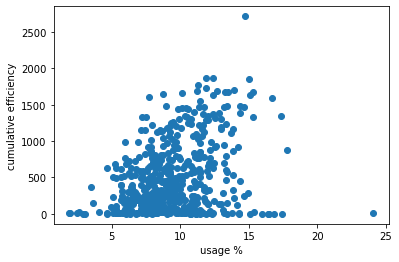

In [173]:
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
plt.show()
plt.scatter(stats.usage , stats.cumulative_efficiency)
plt.xlabel('usage %')
plt.ylabel('cumulative efficiency')

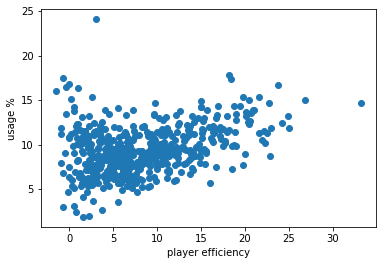

In [174]:
plt.scatter( stats.players_efficiency, stats.usage)
plt.ylabel('usage %')
plt.xlabel('player efficiency')
plt.show()

In [175]:
scaler = MinMaxScaler()

scaler.fit(stats[['usage']])
stats['usage'] = scaler.transform(stats[['usage']])

scaler.fit(stats[['players_efficiency']])
stats['players_efficiency'] = scaler.transform(stats[['players_efficiency']])
stats

,Unnamed: 0_x,ilkid,year_x,firstname,lastname,team,gp,minutes_x,pts,reb,...,d_blk,d_3pm,d_3pa,d_pts,tm_mp,use,cumulative_efficiency,players_efficiency,players_eff,usage
0,17944,ABDURSH01,2003,Shareef,Abdur-rahim,POR,32,728,319,144,...,390.0,417.0,1222.0,7544.0,19979,11.788162,337.0,0.347381,10.531250,0.446107
1,17945,ABDURSH01,2003,Shareef,Abdur-rahim,ATL,53,1957,1065,495,...,409.0,482.0,1345.0,7992.0,18442,11.558478,1172.0,0.681790,22.113208,0.435750
2,17946,ABDURSH01,2003,Shareef,Abdur-rahim,TOT,85,2685,1384,639,...,NaN,NaN,NaN,NaN,76847,NaN,1509.0,0.555895,17.752941,NaN
3,17947,ALLENMA01,2003,Malik,Allen,MIA,45,616,191,119,...,439.0,431.0,1256.0,7359.0,19755,9.239844,216.0,0.181901,4.800000,0.331200
4,17948,ALLENRA02,2003,Ray,Allen,SEA,56,2152,1287,286,...,386.0,486.0,1394.0,8016.0,19805,13.849184,1171.0,0.647070,20.910714,0.539041
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,18522,WILLISH01,2003,Shammond,Williams,TOT,53,765,255,60,...,NaN,NaN,NaN,NaN,76847,NaN,271.0,0.190945,5.113208,NaN
579,18523,WILLISH01,2003,Shammond,Williams,ORL,37,527,183,43,...,444.0,491.0,1301.0,8287.0,19833,8.495365,191.0,0.192358,5.162162,0.297630
580,18524,WOODSLO01,2003,Loren,Woods,MIA,38,506,121,134,...,439.0,431.0,1256.0,7359.0,19755,6.865947,195.0,0.191475,5.131579,0.224158
581,18525,WOODSQY01,2003,Qyntel,Woods,POR,62,673,224,136,...,390.0,417.0,1222.0,7544.0,19979,11.209123,217.0,0.144366,3.500000,0.419997


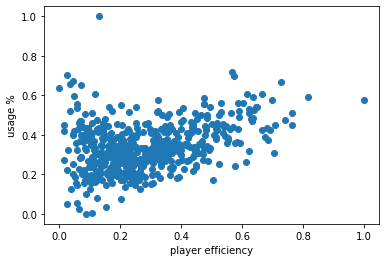

In [176]:
plt.scatter( stats.players_efficiency, stats.usage)
plt.ylabel('usage %')
plt.xlabel('player efficiency')
plt.show()

In [177]:
stats['usage'].isnull().values.any()

True

In [178]:
stats['usage'].isnull().sum()

67

In [179]:
stats['usage'].dropna()
stats

,Unnamed: 0_x,ilkid,year_x,firstname,lastname,team,gp,minutes_x,pts,reb,...,d_blk,d_3pm,d_3pa,d_pts,tm_mp,use,cumulative_efficiency,players_efficiency,players_eff,usage
0,17944,ABDURSH01,2003,Shareef,Abdur-rahim,POR,32,728,319,144,...,390.0,417.0,1222.0,7544.0,19979,11.788162,337.0,0.347381,10.531250,0.446107
1,17945,ABDURSH01,2003,Shareef,Abdur-rahim,ATL,53,1957,1065,495,...,409.0,482.0,1345.0,7992.0,18442,11.558478,1172.0,0.681790,22.113208,0.435750
2,17946,ABDURSH01,2003,Shareef,Abdur-rahim,TOT,85,2685,1384,639,...,NaN,NaN,NaN,NaN,76847,NaN,1509.0,0.555895,17.752941,NaN
3,17947,ALLENMA01,2003,Malik,Allen,MIA,45,616,191,119,...,439.0,431.0,1256.0,7359.0,19755,9.239844,216.0,0.181901,4.800000,0.331200
4,17948,ALLENRA02,2003,Ray,Allen,SEA,56,2152,1287,286,...,386.0,486.0,1394.0,8016.0,19805,13.849184,1171.0,0.647070,20.910714,0.539041
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,18522,WILLISH01,2003,Shammond,Williams,TOT,53,765,255,60,...,NaN,NaN,NaN,NaN,76847,NaN,271.0,0.190945,5.113208,NaN
579,18523,WILLISH01,2003,Shammond,Williams,ORL,37,527,183,43,...,444.0,491.0,1301.0,8287.0,19833,8.495365,191.0,0.192358,5.162162,0.297630
580,18524,WOODSLO01,2003,Loren,Woods,MIA,38,506,121,134,...,439.0,431.0,1256.0,7359.0,19755,6.865947,195.0,0.191475,5.131579,0.224158
581,18525,WOODSQY01,2003,Qyntel,Woods,POR,62,673,224,136,...,390.0,417.0,1222.0,7544.0,19979,11.209123,217.0,0.144366,3.500000,0.419997


In [180]:
table = stats[stats['usage'].notna()]

In [181]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
range_n_clusters = list (range(2,11))
for n_clusters in range_n_clusters:
    cluster = KMeans(n_clusters=n_clusters)
    preds = cluster.fit_predict(table[['usage','players_efficiency']])
    centers = cluster.cluster_centers_

    score = silhouette_score(table[['usage','players_efficiency']], preds)
    print("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.47293661886594673)
For n_clusters = 3, silhouette score is 0.38172757806552987)
For n_clusters = 4, silhouette score is 0.38845325005670556)
For n_clusters = 5, silhouette score is 0.32881120256177226)
For n_clusters = 6, silhouette score is 0.328859860707112)
For n_clusters = 7, silhouette score is 0.3392973837900938)
For n_clusters = 8, silhouette score is 0.33122402926604755)
For n_clusters = 9, silhouette score is 0.34030029694874725)
For n_clusters = 10, silhouette score is 0.34816105238040024)


In [182]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=4)
sort = km.fit_predict(table[['usage','players_efficiency']])
sort

array([0, 1, 3, 1, 0, 3, 0, 3, 3, 1, 2, 2, 3, 1, 2, 0, 0, 1, 3, 0, 3, 2,
       0, 2, 0, 3, 3, 0, 3, 3, 0, 3, 3, 3, 3, 2, 2, 0, 2, 2, 3, 1, 1, 3,
       3, 3, 0, 3, 3, 1, 3, 0, 3, 3, 3, 0, 3, 3, 3, 3, 3, 1, 2, 2, 3, 2,
       2, 2, 3, 3, 0, 0, 2, 2, 3, 1, 3, 2, 0, 3, 2, 2, 1, 2, 0, 2, 3, 2,
       2, 2, 1, 1, 0, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 3, 3, 3, 0, 1, 3, 0,
       3, 0, 1, 0, 0, 0, 0, 1, 3, 3, 3, 3, 0, 1, 3, 3, 3, 3, 2, 2, 2, 3,
       0, 2, 3, 0, 3, 3, 2, 1, 0, 3, 2, 0, 0, 3, 3, 3, 2, 1, 3, 2, 2, 0,
       3, 0, 3, 3, 3, 3, 1, 3, 0, 3, 2, 1, 3, 1, 0, 3, 0, 0, 0, 0, 0, 3,
       2, 0, 0, 3, 3, 2, 3, 3, 3, 3, 3, 1, 3, 3, 3, 0, 0, 1, 0, 3, 3, 3,
       3, 3, 0, 3, 0, 0, 2, 3, 0, 3, 0, 3, 3, 0, 0, 0, 1, 2, 1, 2, 3, 3,
       3, 1, 1, 0, 0, 3, 0, 1, 3, 3, 1, 0, 0, 1, 0, 2, 2, 1, 3, 3, 2, 3,
       2, 3, 0, 3, 0, 2, 1, 3, 2, 3, 3, 0, 3, 1, 1, 0, 3, 3, 0, 2, 0, 0,
       0, 2, 2, 2, 2, 3, 0, 3, 1, 3, 0, 0, 3, 3, 1, 1, 1, 1, 1, 1, 0, 1,
       2, 1, 1, 0, 3, 2, 3, 3, 3, 3, 0, 0, 1, 0, 0,

In [183]:
table['cluster']=sort
table

<ipython-input-183-fb339dc19973>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  table['cluster']=sort


,Unnamed: 0_x,ilkid,year_x,firstname,lastname,team,gp,minutes_x,pts,reb,...,d_3pm,d_3pa,d_pts,tm_mp,use,cumulative_efficiency,players_efficiency,players_eff,usage,cluster
0,17944,ABDURSH01,2003,Shareef,Abdur-rahim,POR,32,728,319,144,...,417.0,1222.0,7544.0,19979,11.788162,337.0,0.347381,10.531250,0.446107,0
1,17945,ABDURSH01,2003,Shareef,Abdur-rahim,ATL,53,1957,1065,495,...,482.0,1345.0,7992.0,18442,11.558478,1172.0,0.681790,22.113208,0.435750,1
3,17947,ALLENMA01,2003,Malik,Allen,MIA,45,616,191,119,...,431.0,1256.0,7359.0,19755,9.239844,216.0,0.181901,4.800000,0.331200,3
4,17948,ALLENRA02,2003,Ray,Allen,SEA,56,2152,1287,286,...,486.0,1394.0,8016.0,19805,13.849184,1171.0,0.647070,20.910714,0.539041,1
5,17949,ALSTORA01,2003,Rafer,Alston,MIA,82,2581,838,226,...,431.0,1256.0,7359.0,19755,8.755437,932.0,0.371479,11.365854,0.309357,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
577,18521,WILLISH01,2003,Shammond,Williams,NOH,16,238,72,17,...,444.0,1301.0,7537.0,19831,10.506908,80.0,0.187676,5.000000,0.388334,2
579,18523,WILLISH01,2003,Shammond,Williams,ORL,37,527,183,43,...,491.0,1301.0,8287.0,19833,8.495365,191.0,0.192358,5.162162,0.297630,3
580,18524,WOODSLO01,2003,Loren,Woods,MIA,38,506,121,134,...,431.0,1256.0,7359.0,19755,6.865947,195.0,0.191475,5.131579,0.224158,3
581,18525,WOODSQY01,2003,Qyntel,Woods,POR,62,673,224,136,...,417.0,1222.0,7544.0,19979,11.209123,217.0,0.144366,3.500000,0.419997,2


/Users/adriannabowen/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/Users/adriannabowen/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/Users/adriannabowen/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

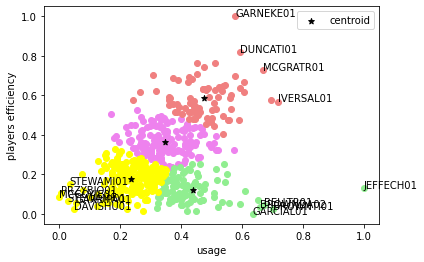

In [196]:
import numpy as np
ids = []

df1 = table[table.cluster==0]
df2 = table[table.cluster==1]
df3 = table[table.cluster==2]
df4 = table[table.cluster==3]
#df5 = table[table.cluster==4]
#df6 = table[table.cluster==5]
plt.scatter(df1.usage, df1.players_efficiency,color='violet')
plt.scatter(df2.usage, df2.players_efficiency,color='lightcoral')
plt.scatter(df3.usage, df3.players_efficiency,color='lightgreen')
plt.scatter(df4.usage, df4.players_efficiency,color='yellow')
#plt.scatter(df5.usage, df5.players_efficiency,color='orange')
#plt.scatter(df6.usage, df6.players_efficiency,color='turquoise')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='black',marker='*',label='centroid')
plt.xlabel('usage')
plt.ylabel('players efficiency')
plt.legend()

dfs = [ df3, df2, df4]
for i, df in enumerate(dfs):
    dfs[i].loc[:, 'usage_distance'] = dfs[i].usage - km.cluster_centers_[i,0]
    dfs[i].loc[:, 'pe_distance'] = dfs[i].players_efficiency - km.cluster_centers_[i,1]

def standardise(df, column):
    xhat = df[column] - df[column].mean()
    df.loc[:, column + '_standardised'] = xhat / xhat.abs().mean()
    return df

for df in dfs:
    df = standardise(df, 'usage_distance')
    df = standardise(df, 'pe_distance')
    for i in df.index:
        if i in df[np.sqrt(df.usage_distance_standardised**2 +
                              df.pe_distance_standardised**2) > 3.36].index:
            text = plt.annotate(df.loc[i].ilkid, (df.loc[i].usage, df.loc[i].players_efficiency))
            ids.append(df.loc[i].ilkid)

In [185]:
table.loc[table['ilkid'].isin(ids)]

,Unnamed: 0_x,ilkid,year_x,firstname,lastname,team,gp,minutes_x,pts,reb,...,d_3pm,d_3pa,d_pts,tm_mp,use,cumulative_efficiency,players_efficiency,players_eff,usage,cluster
44,17988,BELLTR01,2003,Troy,Bell,MEM,6,34,11,4,...,369.0,1091.0,7730.0,19880,16.828440,0.0,0.043310,0.000000,0.673380,2
76,18020,BROWNDA02,2003,Damone,Brown,NJN,3,17,3,5,...,418.0,1193.0,7196.0,19706,16.495357,-1.0,0.033685,-0.333333,0.658361,2
83,18027,BROWNTI01,2003,Tierre,Brown,NOH,3,17,6,1,...,444.0,1301.0,7537.0,19831,17.424379,-2.0,0.024061,-0.666667,0.700252,2
158,18102,DUNCATI01,2003,Tim,Duncan,SAS,69,2527,1538,859,...,311.0,951.0,6909.0,19755,15.019165,1849.0,0.817029,26.797101,0.591797,1
184,18128,GARCIAL01,2003,Alex,Garcia,SAS,2,13,3,0,...,311.0,951.0,6909.0,19755,15.976331,-3.0,0.000000,-1.500000,0.634957,2
185,18129,GARNEKE01,2003,Kevin,Garnett,MIN,82,3231,1987,1139,...,395.0,1181.0,7303.0,19755,14.714002,2717.0,1.000000,33.134146,0.578037,1
192,18136,GIRICGO01,2003,Gordan,Giricek,UTA,25,606,338,62,...,415.0,1209.0,7371.0,19780,14.622682,244.0,0.325113,9.760000,0.573919,0
194,18138,GIRICGO01,2003,Gordan,Giricek,ORL,48,1433,489,164,...,491.0,1301.0,8287.0,19833,8.344682,468.0,0.324824,9.750000,0.290836,0
262,18206,JEFFECH01,2003,Chris,Jefferies,TOR,2,8,8,1,...,273.0,889.0,7253.0,21445,24.071948,6.0,0.129930,3.000000,1.000000,2
263,18207,JEFFECH01,2003,Chris,Jefferies,CHI,19,187,76,28,...,439.0,1236.0,7876.0,19831,11.133598,54.0,0.125371,2.842105,0.416592,2


In [186]:
table.describe()

,Unnamed: 0_x,year_x,gp,minutes_x,pts,reb,asts,stl,blk,turnover,...,d_3pm,d_3pa,d_pts,tm_mp,use,cumulative_efficiency,players_efficiency,players_eff,usage,cluster
count,516.000000,516.0,516.000000,516.000000,516.000000,516.000000,516.000000,516.000000,516.000000,516.000000,...,516.000000,516.000000,516.000000,516.000000,516.000000,516.000000,516.000000,516.000000,516.000000,516.000000
mean,18232.430233,2003.0,46.304264,1113.912791,430.215116,194.387597,98.341085,36.558140,23.298450,65.629845,...,424.364341,1221.377907,7657.794574,19828.077519,9.443956,482.982558,0.283769,8.328094,0.340404,1.635659
std,166.775347,0.0,27.251266,945.477547,446.421711,196.635667,121.073980,35.628702,36.852054,63.136657,...,60.804597,139.152478,384.461248,450.715670,2.714328,475.573842,0.172008,5.957358,0.122393,1.256829
min,17944.000000,2003.0,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,273.000000,889.000000,6909.000000,18442.000000,1.894764,-3.000000,0.000000,-1.500000,0.000000,0.000000
25%,18089.750000,2003.0,21.000000,298.500000,80.750000,46.500000,13.000000,8.000000,2.000000,15.750000,...,409.000000,1180.000000,7359.000000,19755.000000,7.660952,95.000000,0.151518,3.747685,0.260005,0.000000
50%,18229.000000,2003.0,49.000000,837.000000,271.500000,138.000000,51.000000,25.000000,10.000000,45.000000,...,424.000000,1228.000000,7730.000000,19806.000000,9.245467,327.000000,0.245250,6.994025,0.331453,2.000000
75%,18375.250000,2003.0,73.000000,1814.500000,634.250000,279.250000,135.250000,59.000000,24.000000,100.000000,...,456.000000,1301.000000,7990.000000,19855.000000,11.193676,728.750000,0.391830,12.070708,0.419301,3.000000
max,18526.000000,2003.0,82.000000,3331.000000,1987.000000,1139.000000,687.000000,167.000000,246.000000,303.000000,...,555.000000,1534.000000,8287.000000,21445.000000,24.071948,2717.000000,1.000000,33.134146,1.000000,3.000000


In [187]:
table['players_efficiency'].describe()

count    516.000000
mean       0.283769
std        0.172008
min        0.000000
25%        0.151518
50%        0.245250
75%        0.391830
max        1.000000
Name: players_efficiency, dtype: float64

In [188]:
table['players_eff'].describe()

count    516.000000
mean       8.328094
std        5.957358
min       -1.500000
25%        3.747685
50%        6.994025
75%       12.070708
max       33.134146
Name: players_eff, dtype: float64